In [3]:
import torch
from lenet import LeNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using '+str(device)+"!")

model = LeNet()
model = model.to(device)
weights = torch.load('./target/lenet.pt')
model.load_state_dict(weights)

Using cuda!


<All keys matched successfully>

torch.Size([3, 224, 224])
cat


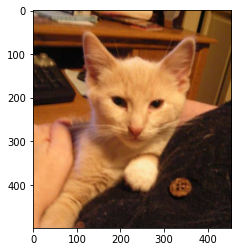

In [15]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

root = r'./data/test'
# root1 = r'C:/Users/LaoZhu/Desktop/test/'
imgnames = os.listdir(root)
imgname = random.choice(imgnames)
path = os.path.join(root + imgname)
img = Image.open(path)
# img
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()          
])

img_tensor = transform(img)

img_tensor = img_tensor.to(device)
print(img_tensor.shape)

import torch.nn.functional as F
result = model(img_tensor)
result = F.softmax(result, dim=1)
# print(result)
class_label = torch.argmax(result)
if class_label == 0:
    print('cat')
elif class_label == 1:
    print('dog')
plt.imshow(img)
plt.show()